In [2]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Roboto&effect=3d|brick-sign|');
span {font-family:Roboto; color:black; text-shadow:4px 4px 4px #aaa;}  
h1,h2 {font-family:Roboto; color:slategray; text-shadow:4px 4px 4px #aaa;} 
div.output_subarea, div.output_area pre{font-family:Roboto; font_size:120%; color:darkblue;}
</style> 

In [8]:
import math, sympy, numpy
sympy.init_printing(use_unicode=True)
from sympy import *
from mpmath import *
from sympy.physics.vector import *

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

import pylab as plt
import matplotlib
%matplotlib inline

[Computer Algebra I: Mathematica, SymPy, Sage, Maxima](http://hyperpolyglot.org/computer-algebra2)

[SymPy. Vector & ReferenceFrame](https://docs.sympy.org/latest/modules/physics/vector/vectors.html)

[LaTeX/Mathematics](https://en.wikibooks.org/wiki/LaTeX/Mathematics)

[МЦНМО. Свободно распространяемые издания](https://www.mccme.ru/free-books/)

# Типовой расчет 10 / Standard Calculation 10

## Постановка  задачи / Formulation of the problem:

Даны два геометрических вектора $\overline{P}$ и $\overline{Q}$.

Представить вектор $\overline{P}$ в виде суммы двух векторов $\overline{P_1}$ и $\overline{P_2}$ таких, что 

- вектор $\overline{P_1}$ перпендикулярен вектору $\overline{Q}$,

- а вектор $\overline{P_2}$ вектору $\overline{Q}$ коллинеарен.

$\overline{P} \{3; 4; 1\}; \overline{Q} \{1; 2; 1\}$

In [41]:
V = ReferenceFrame('V')
P = 3 * V.x + 4 * V.y + 1 * V.z
Q = 1 * V.x + 2 * V.y + 1 * V.z

In [42]:
P 

In [43]:
Q

## Решение / Decision

Пусть $\overline{P_1} \{x_1, x_2, x_3\}; \overline{P_2} \{x_4, x_5, x_6\}$.

$\overline{P} = \overline{P_1}  + \overline{P_2} \implies
\begin{cases}
x_1 + x_4 = 3 \\
x_2 + x_5 = 4 \\
x_3 + x _6 = 1
\end{cases} \iff
\begin{cases}
x_4 = 3 - x_1 \\
x_5 = 4 - x_2 \\
x_6 = 1 - x _3
\end{cases} \ (1)$

$\overline{P_1}  \perp \overline{Q} \implies 1 * x_1 + 2 * x_2 + 1 * x_3 = 0 \implies x_1 = -2x_2 - x_3 \ (2)$

$\overline{P_2}  \parallel \overline{Q} \implies 
\begin{cases}
\lambda * x_4  = 1 \\
\lambda * x_5  = 2 \\
\lambda * x_6 = 1 \\
\end{cases} \ (3)$

In [12]:
p1,p2,p3 = 3,4,1
q1,q2,q3 = 1,2,1
x1,x2,x3,x4,x5,x6,t = sympy.symbols('x1,x2,x3,x4,x5,x6,t')
eq1 = x1+x4-p1
eq2 = x2+x5-p2
eq3 = x3+x6-p3
eq4 = q1*x1 + q2*x2 + q3 * x3
eq5 = t*x4-q1
eq6 = t*x5-q2
eq7 = t*x6-q1

Подставим в (3) равенства (1) и (2):

$\begin{cases}
\lambda * (3 + 2x_2 + x_3)  = 1 \\
\lambda * (4 - x_2)  = 2 \\
\lambda * (1 - x_3) = 1 
\end{cases} \iff
\begin{cases}
3 + 2x_2 + x_3  = 1 / \lambda \\
4 - x_2  = 2 / \lambda \\
1 - x_3 = 1 / \lambda\\
\end{cases}$

Из второго равенства полученной системы вычтем первое и третье:

$4 - x_2  - 3 - 2x_2 - x_3 - 1 + x_3 = 2 / \lambda - 1 / \lambda - 1 / \lambda \iff -3x_2 = 0 \iff x_2 = 0$

Из первого равенства вычтем третье:

$3 + 2x_2 + x_3  - 1 + x_3 = 1 / \lambda - 1 / \lambda \iff 2x_3 = -2 - 2x_2 \iff x_3 = -1 -x_2 \implies x_3 = -1$

$x_1 = -2 * 0 -(-1) = 1$

$x_4 = 3 - 1 = 2; x_5 = 4 - 0 = 4; x_6 = 1 - (-1) = 2$ 

$\lambda = 1 / (1 - (-1)) = 0.5$

$\overline{P_1} \{1; 0; -1\}; \overline{P_2} \{2; 4; 2\}$

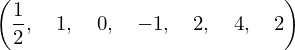

In [32]:
s = sympy.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7], t,x1,x2,x3,x4,x5,x6)[0]
t,p11,p12,p13,p21,p22,p23 = s[0],s[1],s[2],s[3],s[4],s[5],s[6]
s

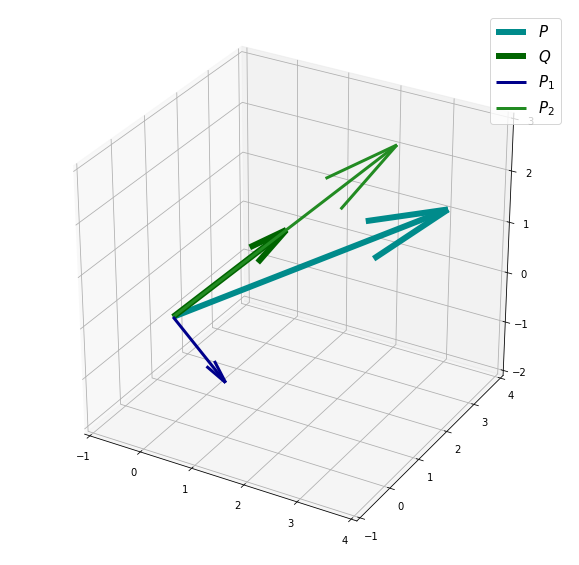

In [28]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111, projection='3d')
l = ['$P$','$Q$','$P_1$','$P_2$']; c = ['darkcyan','darkgreen','darkblue','forestgreen']; lw=[6,6,3,3]
x = [p1,q1,p11,p21]; y = [p2,q2,p12,p22]; z = [p3,q3,p13,p23]
ax.set_xlim([-1,4]); ax.set_ylim([-1,4]); ax.set_zlim([-2,3])
for i in range(4):
    ax.quiver(0, 0, 0, x[i], y[i], z[i], lw=lw[i], color=c[i], label=l[i])
ax.legend(fontsize=15);

In [47]:
P1 = p11 * V.x + p12 * V.y + p13 * V.z
P2 = p21 * V.x + p22 * V.y + p23 * V.z
P1 + P2

In [48]:
t * P2

In [49]:
# P1 + P2 = P , P1⊥Q, P1*Q=0, P2||Q, 𝜆 * P2 == Q
P1 + P2 == P, dot(P1, Q) == 0, t * P2 == Q

(True, True, True)

# Типовой расчет 11 / Standard Calculation 11

## Постановка  задачи / Formulation of the problem:

В ромбе $ABCD$ даны уравнения двух его сторон $AB$ и $AD$, а также координаты вершины $C$.

Найти площадь ромба.

$AD: 9X - 11Y + 2 = 0; AB: 11X - 9Y - 2 = 0; C (21;21)$.

In [76]:
X,Y = sympy.symbols('X,Y')
eqAD = 9*X-11*Y+2
eqAB = 11*X-9*Y-2
xC,yC = 21,21

## Решение / Decision
1) Найдем координаты точки пересечения прямых $AB$ и $AD$ - вершины $А$:

$\begin{cases}
9X - 11Y + 2 = 0 \\
11X - 9Y - 2 = 0 
\end{cases}$

Умножим первое уравнение на 11, второе - на -9 и сложим:

$-40Y_A + 40 = 0 \implies Y_A = 1 \implies 9X_A - 11 + 2 =0 \implies X_A = 1 \implies A \ (1; 1)$.

2) Запишем уравнение прямой $AC$:

$\frac{X - X_A}{X_C - X_A} = \frac{Y - Y_A}{Y_C - Y_A}$

$\frac{X - 1}{21 - 1} = \frac{Y - 1}{21 - 1} \iff X -1 = Y - 1\iff X - Y = 0$

In [77]:
xA,yA = sympy.solve([eqAD,eqAB], X,Y)[X], sympy.solve([eqAD,eqAB], X,Y)[Y]
eqAC = (X-xA)/(xC-xA)*(yC-yA)-(Y-yA)
(xA,yA),eqAC

3) Найдем координаты середины отрезка $AC$ и обозначим ее $O$:
    
$X_O = (1 + 21) / 2 = 11; Y_O =  (1 + 21) / 2 = 11 \implies O \ (11; 11)$  

4) Диагональ $BD \perp AC; O \in BD$. Запишем уравнение $BD$ с учетом того, что 

угловые коэффициенты перпендикулярных прямых связаны соотношением $k_{AC} * k_{BD} = -1$: 

$k_{AC} = 1 \implies k_{BD} = -1$

$Y - Y_O = k_{BD} * (X - X_O) \iff Y - 11 = -X + 11 \iff X + Y - 22 = 0$ 

In [78]:
xO,yO = (xA+xC)/2,(yA+yC)/2
kBD = -1/(yC-yA)*(xC-xA)
eqBD = Y-yO-kBD*(X-xO)
xO,yO,eqBD

5) Найдем координаты точки пересечения прямых $AB$ и $BD$ - вершины $B$:

$\begin{cases}
11X - 9Y - 2 = 0 \\
X + Y - 22 = 0 
\end{cases}$

Умножим второе уравнение на -11 и сложим с первым:

$-20Y_B  + 240 = 0 \implies Y_B = 12 \implies X_B + 12 - 22 = 0 \implies X_B = 10 \implies B \ (10; 12)$.

In [79]:
xB,yB = sympy.solve([eqBD,eqAB], X,Y)[X], sympy.solve([eqBD,eqAB], X,Y)[Y]
xB,yB

6) Площадь треугольника $ABC$ в прямоугольной декартовой системе координат:
    
$ S_{\triangle ABC} = \pm \frac{1}{2}
\begin{vmatrix}
X_C - X_A & Y_C - Y_A \\
X_B - X_A & Y_B - Y_A
\end{vmatrix} \implies
S_{\triangle ABC} = \pm \frac{1}{2}
\begin{vmatrix}
21 - 1 & 21 - 1 \\
10 - 1 & 12 - 1
\end{vmatrix} = \frac{1}{2} * (20*11 - 20 * 9) = 20
$

По условию, $ABCD$ - ромб $\implies \triangle ABC = \triangle ADC \implies S_{ABCD} = 2 * S_{\triangle ABC} = 2 * 20 = 40$.

In [80]:
sABC = sympy.Matrix([[xC-xA,yC-yA],[xB-xA,yB-yA]]).det()/2
sABCD = 2*sABC
sABC, sABCD

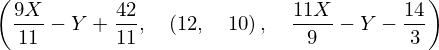

In [85]:
eqBC = (X-xC)/(xB-xC)*(yB-yC)-(Y-yC)
xD,yD = sympy.solve([eqBD,eqAD], X,Y)[X], sympy.solve([eqBD,eqAD], X,Y)[Y]
eqCD = (X-xD)/(xC-xD)*(yC-yD)-(Y-yD)
eqBC, (xD,yD), eqCD

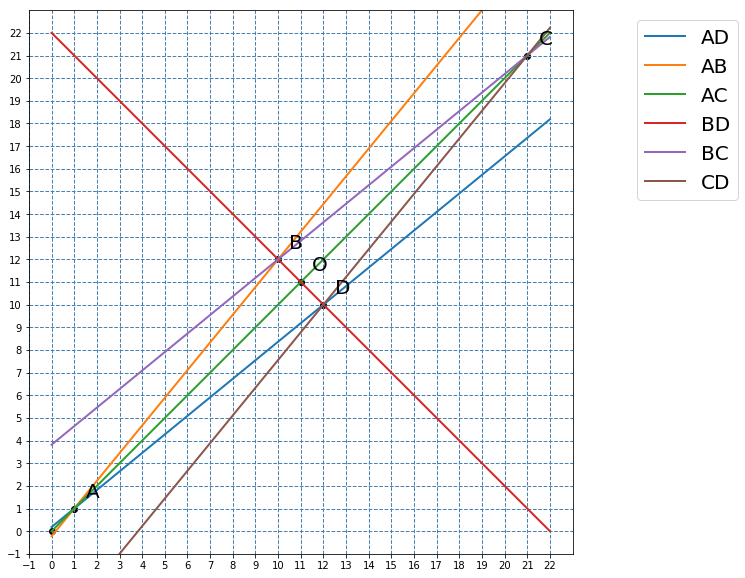

In [74]:
f = plt.figure(figsize=(10,10)); ax = f.add_subplot(111, aspect=1)
ax.grid(c='steelblue', ls='--', lw=1)

x = numpy.linspace(0,22)
y = [(9*x+2)/11, (11 *x-2)/9, x, -x+22, (9*x+42)/11, (11 *x-42)/9 ]
l_labels = ['AD', 'AB', 'AC', 'BD','BC','CD']; p_labels = ['A', 'B', 'D', 'C', 'O',' ']
X = [1,10,12,21,11,0]; Y = [1,12,10,21,11,0]

for i in range(6):
    ax.plot(x, y[i], lw=2, label=l_labels[i])
    ax.scatter(X[i], Y[i], color='black')
    ax.text(X[i]+0.5, Y[i]+0.5, p_labels[i], fontsize=20)

plt.xlim(-1,23); plt.ylim(-1,23)
ax.set_xticks(numpy.arange(-1, 23, 1)); ax.set_yticks(numpy.arange(-1, 23, 1))
ax.legend(fontsize=20, bbox_to_anchor=(1.1, 1.0));

# Типовой расчет 12 / Standard Calculation 12

## Постановка  задачи / Formulation of the problem:

Найти точку, симметричную данной точке $A$ относительно прямой $b$, 

- проходящей через данную точку $B$ и 
- перпендикулярной данной плоскости $\alpha$.

$A \ (17; 15; 22); B \ (3; 1; 8); \alpha: X + 2Y - 3Z +12 = 0$.

In [91]:
xA,yA,zA = 17,15,22
xB,yB,zB = 3,1,8
X,Y,Z,T = sympy.symbols('X,Y,Z,T')
eqALPHA = X+2*Y-3*Z+12

## Решение / Decision

1) Плоскость $\alpha: X + 2Y - 3Z + 12 = 0$ задана уравнением в общем виде.
    
Нормальный вектор плоскости имеет координаты: $\overrightarrow{b} \{1; 2;-3\}$.

Вектор $\overrightarrow{b}$ является направляющим для прямой $b \perp \alpha$.

Учитывая то, что $B \in b$, запишем канонические уравнения этой прямой:

$\large{b: \frac{X - 3}{1} = \frac{Y - 1}{2} = \frac{Z - 8}{-3}}$

или в параметрическом виде:

$b: \begin{cases}
X = T + 3 \\
Y = 2T + 1 \\
Z = -3T + 8
\end{cases}$

In [92]:
b1, b2,b3 = 1,2,-3
eq_b1 = b1*T +xB-X; eq_b2 = b2*T+yB-Y; eq_b3 = b3*T+zB-Z
eq_b1,eq_b2,eq_b3

2) Найдем координаты точки $O$ - точки пересечения прямой $b$

и перпендикулярной ей прямой, проходящей через точку $A$:
    
$O \in b \implies
\begin{cases}
X_O = T_O + 3 \\
Y_O = 2T_O + 1 \\
Z_O = -3T_O + 8
\end{cases}$

$\overrightarrow{OA} \perp b \implies \overrightarrow{OA} \perp \overrightarrow{b} \implies \overrightarrow{OA} * \overrightarrow{b} = 0$

Запишем координаты вектора $\overrightarrow{OA}$:

$\overrightarrow{OA} \{17 - (T_O + 3); 15 - (2T_O + 1); 22 - (-3T_O + 8)\} = \{14 - T_O; 14 - 2T_O; 14 + 3T_O\}$

$\overrightarrow{OA} * \overrightarrow{b} = 1*(14 - T_O) + 2 * (14 - 2T_O) - 3 * (14 + 3T_O) = 0$

$-14T_O = 0 \iff T_O = 0 \implies O \ (3; 1; 8) \equiv B \implies AB \perp b$

In [95]:
xOA, yOA,zOA = xA-( b1*T +xB),yA-(b2*T+yB),zA-(b3*T+zB)
eqOAb = xOA*b1+yOA*b2+zOA*b3
(xOA, yOA,zOA),eqOAb

In [96]:
sO = sympy.solve([eq_b1,eq_b2,eq_b3,eqOAb])
xO,yO,zO = sO[X],sO[Y],sO[Z]
xO,yO,zO

3) Пусть точка $C$ симметрична точке $A$ относительно прямой $b$.

тогда $C \in AB \implies B \ $ является серединой отрезка $AC$:
    
 $\frac{X_A + X_C}{2} =  X_B, \frac{Y_A + Y_C}{2} =  Y_B, \frac{Z_A + Z_C}{2} =  Z_B$
 
  $\frac{17 + X_C}{2} =  3, \frac{15 + Y_C}{2} = 1, \frac{22 + Z_C}{2} = 8$
  
  $X_C =  -11, Y_C = -13, Z_C = -6 \implies C \ (-11;-13;-6)$

In [98]:
eq_C1 = (xA+X)/2-xB; eq_C2 = (yA+Y)/2-yB; eq_C3 = (zA+Z)/2-zB
sC = sympy.solve([eq_C1,eq_C2,eq_C3])
xC,yC,zC = sC[X],sC[Y],sC[Z]
xC,yC,zC

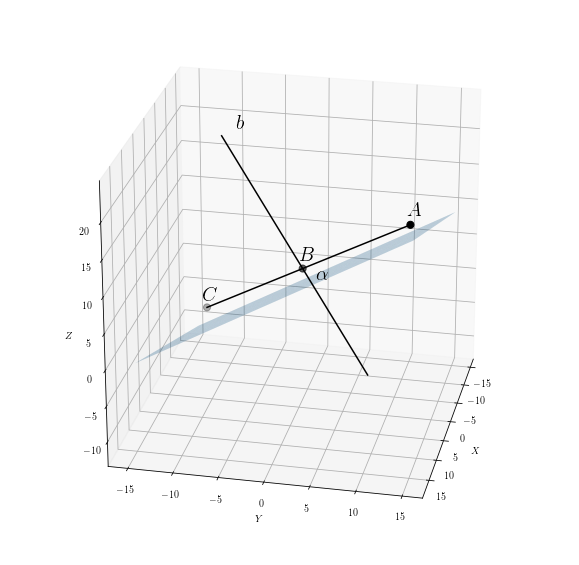

In [180]:
f = plt.figure(figsize=(10,10)); ax = f.add_subplot(111, projection='3d')
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

x = numpy.linspace(-15, 15); y = numpy.linspace(-15, 15)
x, y = numpy.meshgrid(x, y)
z = x / 3 + 2 * y / 3 + 4; t=2

ax.text(17+t,15,22+t,r'$A$', fontsize=20); ax.text(3+t,1,8+t,r'$B$', fontsize=20)
ax.text(-11+t,-13,-6+t,r'$C$', fontsize=20)
ax.text(-2+t,-9+t,23+t,r'$b$', fontsize=20); ax.text(-10,0,0,r'$\alpha$', fontsize=20)

ax.scatter([17, 3,-11],[15, 1,-13],[22, 8,-6], s=50, c='black')
ax.plot([-2, 7], [2*(-2-3)+1, 2*(7-3)+1], [-3*(-2-3)+8, -3*(7-3)+8], c='black')
ax.plot([17, -11], [15, -13], [22, -6], c='black')
ax.plot_surface(x, y, z, alpha=0.3)

ax.set_xlabel(r'$X$'); ax.set_ylabel(r'$Y$'); ax.set_zlabel(r'$Z$')
ax.view_init(25,12);